# Presentation of the test results - 
In this part - 3 of our project review, we trained and compared the test results of the following classification models - 
- Linear Classifier/SVM
- K Nearest Neighbors
- Random Forest
- Decision Tree
- Extreme Learning Machine
- SVM polynomial
- Deep Learning/MLP
- Random Forest with feature selection (Bidirectional elimination method)

In [1]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from skelm import ELMClassifier
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the cleaned dataset

group_16_df = pd.read_csv('Group_16_data_cleaned.csv')
group_16_df.head()

,Unnamed: 0,Subject,Hold .,Hold t,Hold i,Hold e,Hold Shift,Hold 5,Hold Shift.1,Hold Caps,...,Size Caps,Size r,Size o,Size a,Size n,Size l,Size Enter,AvH,AvP,AvA
0,0,1.0,106.0,92.0,111.0,85.0,123.0,82.0,70.0,101.00,...,0.225806,0.225806,0.322581,0.290323,0.225806,0.354839,0.274194,103.035714,0.190971,0.288018
1,1,1.0,106.0,88.0,111.0,83.0,123.0,101.0,81.0,94.00,...,0.225806,0.225806,0.322581,0.322581,0.258065,0.387097,0.322581,103.035714,0.186514,0.285138
2,2,1.0,106.0,90.0,111.0,65.0,79.0,73.0,96.0,63.25,...,0.225806,0.193548,0.290323,0.322581,0.225806,0.258065,0.274194,103.035714,0.186171,0.285138
3,3,1.0,106.0,81.0,111.0,72.0,83.0,94.0,89.0,104.00,...,0.225806,0.225806,0.258065,0.290323,0.225806,0.322581,0.322581,103.035714,0.177943,0.285138
4,4,1.0,106.0,72.0,111.0,82.0,62.0,89.0,68.0,88.00,...,0.290323,0.225806,0.322581,0.258065,0.225806,0.290323,0.387097,103.035714,0.163971,0.285138


In [3]:
# extracting and assigning the input and output variables from the dataset

x, y = group_16_df.iloc[:, 2:].values, group_16_df['Subject'].values
x.shape, y.shape

((2856, 71), (2856,))

In [4]:
# splitting the imported dataset as train(70%) and test(30%) sets.

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 222)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

(1999, 71) (1999,)
(857, 71) (857,)


In [5]:
# Define all classifiers with best parameters

lin_clf = SGDClassifier(loss = 'hinge', max_iter = 100, penalty = 'l2', random_state = 222)
KNN = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 9, p = 1)
RF = RandomForestClassifier(random_state = 222, n_estimators = 290, max_depth = 60)
DT = tree.DecisionTreeClassifier(random_state = 222, min_samples_split = 4, max_depth = 23, criterion = 'gini')

ELM = ELMClassifier(n_neurons = 500, ufunc = 'relu', random_state = 222, alpha = 0.0001)
SVC = SVC(C = 50, degree = 2, kernel = 'poly', random_state = 222)
MLP = MLPClassifier(solver = 'adam', learning_rate = 'constant', hidden_layer_sizes = (1000,), alpha = 0.0001,
      activation = 'logistic', random_state = 222)

## Random Forest with feature selection (Bi-directional elimination method)

In [6]:
# important features after 

important_features = ['Hold .', 'Hold i', 'Hold e', 'Hold 5', 'Hold Shift.1', 'Hold Caps', 'Hold o', 'Hold a', 'Hold n', 
                      'Hold l', 'Hold Enter', 'DD ..t', 'DD t.i', 'DD i.e', 'DD e.Shift', 'DD Shift.5', 'DD Shift.Caps', 
                      'DD Caps.r', 'DD o.a', 'DD a.n', 'DD n.l', 'DD l.Enter', 'UD ..t', 'UD t.i', 'UD i.e', 'UD e.Shift', 
                      'UD Shift.5', 'UD 5.Shift', 'UD Shift.Caps', 'UD Caps.r', 'UD r.o', 'UD a.n', 'UD n.l', 'UD l.Enter', 
                      'Pressure .', 'Pressure t', 'Pressure i', 'Pressure Shift', 'Pressure 5', 'Pressure Shift.1', 
                      'Pressure Caps', 'Pressure r', 'Pressure o', 'Pressure n', 'Pressure Enter', 'Size t', 'Size i', 
                      'Size e', 'Size Shift', 'Size 5', 'Size Caps', 'Size r', 'Size a', 'Size n', 'Size l', 'Size Enter', 
                      'AvH', 'AvP', 'AvA']

In [7]:
# Building new dataset by removing unwanted features

x_sfs, y = group_16_df[important_features], group_16_df['Subject']
x_sfs.shape, y.shape

((2856, 59), (2856,))

In [8]:
# again splitting this new dataset as train(70%) and test(30%) sets.

x_train_sfs,x_test_sfs,y_train,y_test = train_test_split(x_sfs, y, test_size = 0.3, random_state = 222)
print(x_train_sfs.shape, y_train.shape)
print(x_test_sfs.shape, y_test.shape)

scaler = StandardScaler()
x_train_sfs = scaler.fit_transform(x_train_sfs)
x_test_sfs = scaler.fit_transform(x_test_sfs)

(1999, 59) (1999,)
(857, 59) (857,)


In [9]:
rf_sfs = RandomForestClassifier(random_state = 222, n_estimators = 290, max_depth = 60)
rf_sfs.fit(x_train_sfs, y_train)

y_pred_train = rf_sfs.predict(x_train_sfs)
y_pred_test = rf_sfs.predict(x_test_sfs)

sfs_test_score = accuracy_score(y_pred_test, y_test)
sfs_test_score

0.9498249708284714

### Comparision of accuracy scores of individual models vs (RF with feature selection) on the test data.


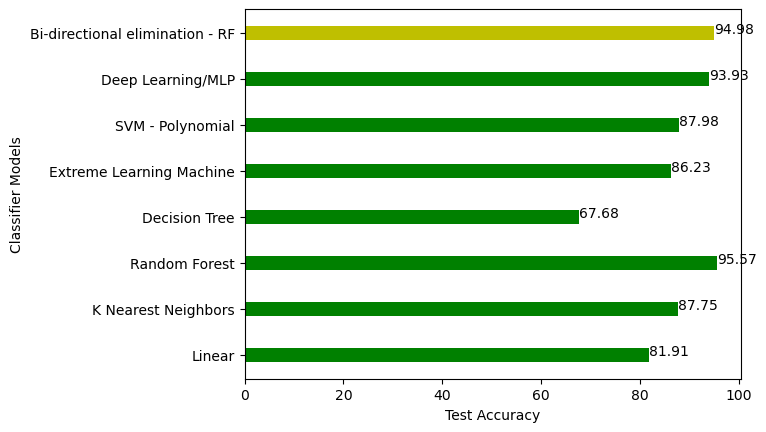

In [10]:
clf_list = [lin_clf, KNN, RF, DT, ELM, SVC, MLP]
ax = ['Linear', 'K Nearest Neighbors', 'Random Forest', 'Decision Tree', 'Extreme Learning Machine', 'SVM - Polynomial', 'Deep Learning/MLP', 'Bi-directional elimination - RF']
ay = []
for clf in clf_list:
    clf.fit(x_train, y_train)
    pred_test = clf.predict(x_test)
    test_acc = accuracy_score(pred_test, y_test)
    ay.append(round(test_acc*100, 2))
    
ay.append(round(sfs_test_score*100, 2))    
    
plt.barh(ax, ay, color = ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'y'], height = 0.3)
for index, value in enumerate(ay):
    plt.text(value, index, str(value))
plt.xlabel('Test Accuracy')
plt.ylabel('Classifier Models')
plt.show()